<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/en/1/1d/Bellabeat_logo.webp"/>
</div>
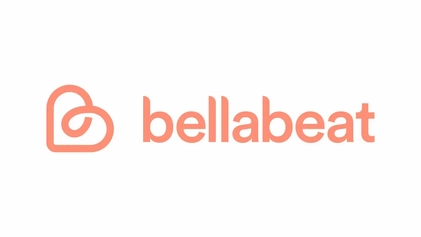
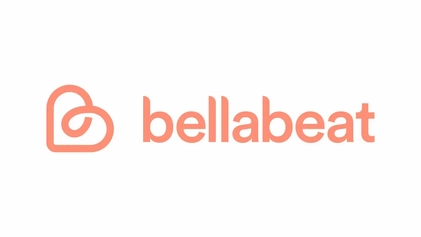
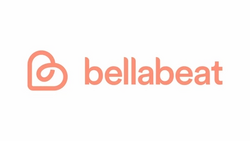
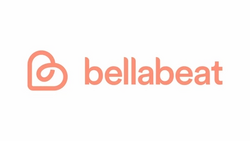
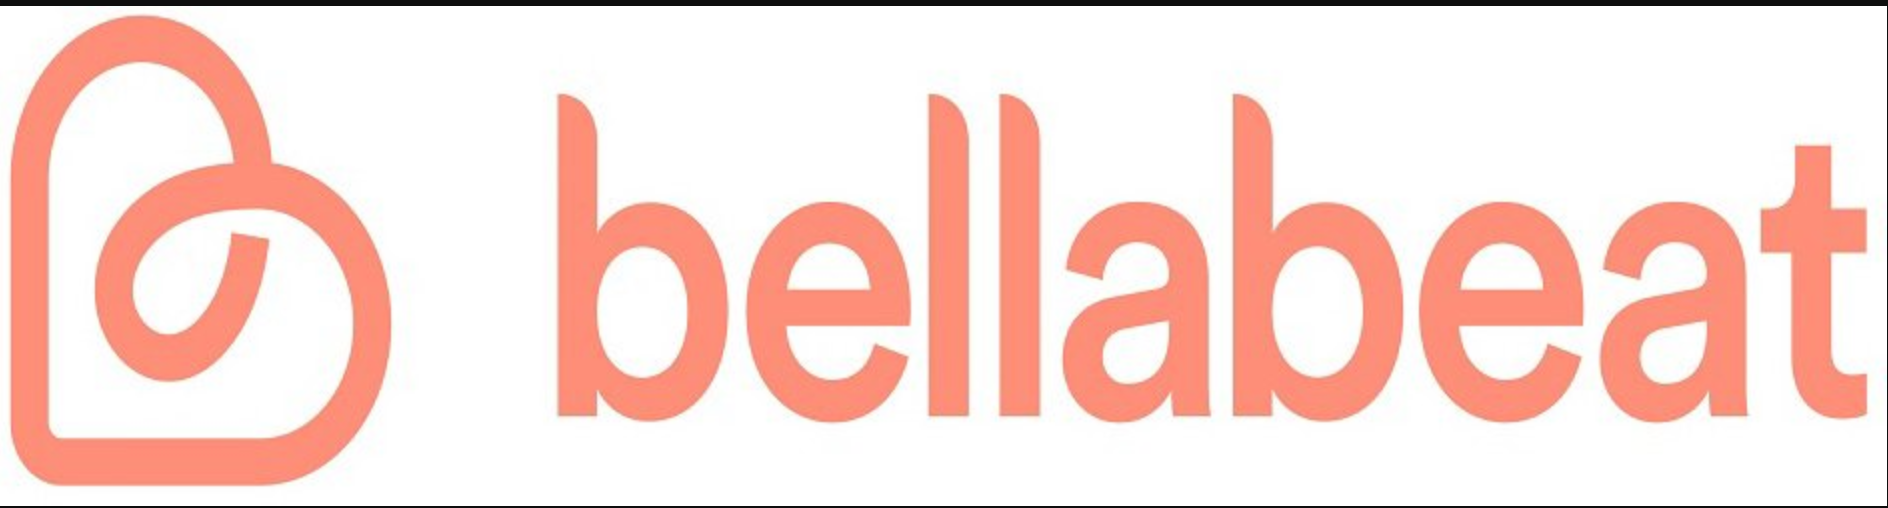
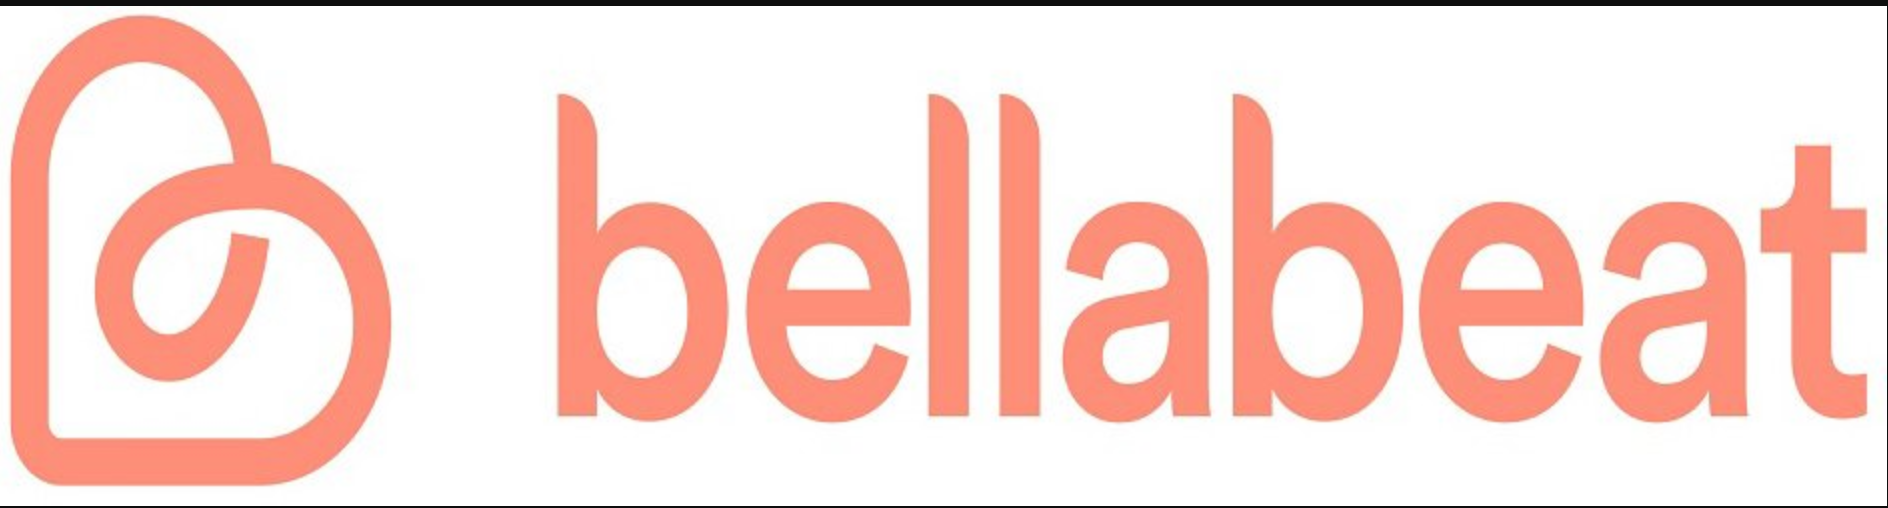
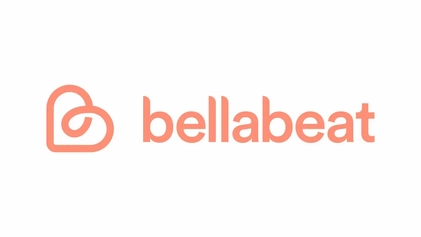
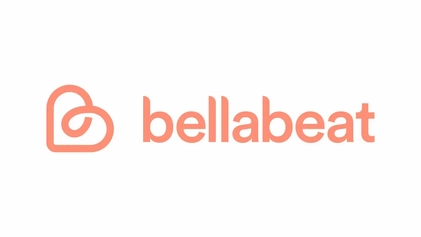

# Summary
Bellabeat is an innovative company that creates high-tech, health-focused products designed to empower women with a deeper understanding of their physical well-being. Their range of smart devices tracks activity, sleep, stress, and reproductive health, providing valuable insights to help women make informed decisions about their health and habits.

In this case, the goal is to analyze fitness data from Bellabeat's smart devices and explore how it can lead to new growth opportunities for the brand. Our focus will be on one of their flagship offerings: the Bellabeat app.

The Bellabeat app serves as a comprehensive tool for users, providing detailed health data related to activity, sleep, stress, menstrual cycles, and mindfulness. This information enables users to gain insights into their current habits, allowing them to make healthier, more conscious choices. The app seamlessly integrates with Bellabeat's smart wellness products, enhancing the user experience by tracking and analyzing vital health data.

# Ask Phase
### Key Stakeholders 
* Urška Sršen (Cofounder and Chief Creative Officer): Visionary leader seeking insights to guide strategic growth initiatives.
* Sando Mur (Cofounder and Mathematician): Interested in data-driven approaches to product development and business growth.
* Bellabeat Marketing Analytics Team: Responsible for collecting and analyzing data to support marketing strategies.
* Bellabeat Executive Team: Decision-makers who will use the findings to inform broader business and marketing strategies.

### Business Task

The problem we are trying to solve is understanding how consumers use smart devices to track their health and wellness activities. Specifically, we aim to identify trends and usage patterns from other smart device companies to gain useful insights. Important insights would be:
* How to improve products and tailor the user experience to meet customers preferences and requirements.
* How to optimize marketing strategy to target potential customers.


These data-driven decisions will enable Bellabeat to create products and marketing strategies that align with customer needs, fostering stronger brand loyalty and positioning the company for sustained growth.

# Prepare Phase
### Where is this data stored?
The data source used for our case study is FitBit Fitness Tracker Data. The dataset is stored in kaggle and was made through Mobius

The data originally comes from: https://zenodo.org/records/53894#.X9oeh3Uzaao

### How the data was collected?
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.  Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences. 

### How is the data organized?
There are available to us two versions of data. 
First one that has 18 csv files that contains data from 12.04.2016 to 12.05.2016. Most files contain data of 33 users for 31 days.

Second version has 11 csv files that contain data from 12.03.2016 to 11.04.2016. Most files contain data of 34 users for 31 days.

Is it in long or wide format? -> Long format

### Does your data ROCCC?
Acronym ROCCC stands for:<br>
reliable - Our data has somewhat low participation, but can provide reliable results with over 30 users.<br>
original - This data was collected through a survey via Amazon Mechanical Turk<br>
comprehensive - This dataset has many metrics to measure user activities, like step counts and activity times. These measurements fit Bellabeat's needs and can be used for this case.<br>
current - This data is not very current, because it was collected almost 10 years ago in 2016. Trends have undoubtedly changed over these years. <br>
cited - https://zenodo.org/record/53894#.YMoUpnVKiP9

### Licence:
cc0: public domain - no copyright

### What data will I analyze?
DailyActivities seems the most useful file, because it consists of daily steps, distance, intensities and calories recorded for 2 months from 12.03.2016 to 12.05.2016 when we merge 2 versions. Few other documents are included in this file.

SleepDay also seems useful. It is not included in the dailyActivities file and contains data about total time in bed and total time asleep, but only for one month from 12.03.2016 to 11.04.2016.

# Process

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#### DataFrames

In [4]:
# Files from 3.12.16 - 4.11.16
df_minuteCaloriesNarrow_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv")
df_weightLogInfo_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")
df_minuteMETsNarrow_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv")
df_hourlyCalories_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv")
df_heartrateSeconds_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv")
df_minuteSleep_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv")
df_hourlyIntensities_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv")
df_hourlySteps_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv")
df_minuteStepsNarrow_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv")
df_minuteIntensitiesNarrow_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv")
df_dailyActivity_3_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")

# Files from 4.12.16 - 5.12.16
df_minuteCaloriesNarrow_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
df_weightLogInfo_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
df_sleepDay_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
df_dailyIntensities_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
df_minuteIntensitiesWide_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
df_minuteMETsNarrow_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
df_dailyCalories_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
df_hourlyCalories_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
df_heartrateSeconds_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
df_minuteSleep_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
df_hourlyIntensities_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
df_hourlySteps_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
df_minuteStepsNarrow_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
df_dailySteps_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
df_minuteStepsWide_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
df_minuteIntensitiesNarrow_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
df_minuteCaloriesWide_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
df_dailyActivity_4_12_16 = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

#### Check files to see how many users are in each file

In [5]:
# Files from 3.12.16 - 4.11.16
print("minuteCaloriesNarrow_3_12_16:", len(df_minuteCaloriesNarrow_3_12_16["Id"].unique()))
print("weightLogInfo_3_12_16:", len(df_weightLogInfo_3_12_16["Id"].unique()))
print("minuteMETsNarrow_3_12_16:", len(df_minuteMETsNarrow_3_12_16["Id"].unique()))
print("hourlyCalories_3_12_16:", len(df_hourlyCalories_3_12_16["Id"].unique()))
print("heartrateSeconds_3_12_16:", len(df_heartrateSeconds_3_12_16["Id"].unique()))
print("minuteSleep_3_12_16:", len(df_minuteSleep_3_12_16["Id"].unique()))
print("hourlyIntensities_3_12_16:", len(df_hourlyIntensities_3_12_16["Id"].unique()))
print("hourlySteps_3_12_16:", len(df_hourlySteps_3_12_16["Id"].unique()))
print("minuteStepsNarrow_3_12_16:", len(df_minuteStepsNarrow_3_12_16["Id"].unique()))
print("minuteIntensitiesNarrow_3_12_16:", len(df_minuteIntensitiesNarrow_3_12_16["Id"].unique()))
print("dailyActivity_3_12_16:", len(df_dailyActivity_3_12_16["Id"].unique()))
print("\n")
# Files from 4.12.16 - 5.12.16
print("minuteCaloriesNarrow_4_12_16:", len(df_minuteCaloriesNarrow_4_12_16["Id"].unique()))
print("weightLogInfo_4_12_16:", len(df_weightLogInfo_4_12_16["Id"].unique()))
print("sleepDay_4_12_16:", len(df_sleepDay_4_12_16["Id"].unique()))
print("dailyIntensities_4_12_16:", len(df_dailyIntensities_4_12_16["Id"].unique()))
print("minuteIntensitiesWide_4_12_16:", len(df_minuteIntensitiesWide_4_12_16["Id"].unique()))
print("minuteMETsNarrow_4_12_16:", len(df_minuteMETsNarrow_4_12_16["Id"].unique()))
print("dailyCalories_4_12_16:", len(df_dailyCalories_4_12_16["Id"].unique()))
print("hourlyCalories_4_12_16:", len(df_hourlyCalories_4_12_16["Id"].unique()))
print("heartrateSeconds_4_12_16:", len(df_heartrateSeconds_4_12_16["Id"].unique()))
print("minuteSleep_4_12_16:", len(df_minuteSleep_4_12_16["Id"].unique()))
print("hourlyIntensities_4_12_16:", len(df_hourlyIntensities_4_12_16["Id"].unique()))
print("hourlySteps_4_12_16:", len(df_hourlySteps_4_12_16["Id"].unique()))
print("minuteStepsNarrow_4_12_16:", len(df_minuteStepsNarrow_4_12_16["Id"].unique()))
print("dailySteps_4_12_16:", len(df_dailySteps_4_12_16["Id"].unique()))
print("minuteStepsWide_4_12_16:", len(df_minuteStepsWide_4_12_16["Id"].unique()))
print("minuteIntensitiesNarrow_4_12_16:", len(df_minuteIntensitiesNarrow_4_12_16["Id"].unique()))
print("minuteCaloriesWide_4_12_16:", len(df_minuteCaloriesWide_4_12_16["Id"].unique()))
print("dailyActivity_4_12_16:", len(df_dailyActivity_4_12_16["Id"].unique()))

minuteCaloriesNarrow_3_12_16: 34
weightLogInfo_3_12_16: 11
minuteMETsNarrow_3_12_16: 34
hourlyCalories_3_12_16: 34
heartrateSeconds_3_12_16: 14
minuteSleep_3_12_16: 23
hourlyIntensities_3_12_16: 34
hourlySteps_3_12_16: 34
minuteStepsNarrow_3_12_16: 34
minuteIntensitiesNarrow_3_12_16: 34
dailyActivity_3_12_16: 35


minuteCaloriesNarrow_4_12_16: 33
weightLogInfo_4_12_16: 8
sleepDay_4_12_16: 24
dailyIntensities_4_12_16: 33
minuteIntensitiesWide_4_12_16: 33
minuteMETsNarrow_4_12_16: 33
dailyCalories_4_12_16: 33
hourlyCalories_4_12_16: 33
heartrateSeconds_4_12_16: 14
minuteSleep_4_12_16: 24
hourlyIntensities_4_12_16: 33
hourlySteps_4_12_16: 33
minuteStepsNarrow_4_12_16: 33
dailySteps_4_12_16: 33
minuteStepsWide_4_12_16: 33
minuteIntensitiesNarrow_4_12_16: 33
minuteCaloriesWide_4_12_16: 33
dailyActivity_4_12_16: 33


Due to the small sample we won’t use weight ( 8 users in first version and 11 in second ) and heart rate ( 14 users in both versions ) sets.

In [6]:
df_sleepDay = df_sleepDay_4_12_16

#### Merge dailyActivities files

In [7]:
#df_dailyActivity = df_dailyActivity_3_12_16.merge(df_dailyActivity_4_12_16, on = 'Id', how = 'inner')
df_dailyActivity = pd.concat([df_dailyActivity_3_12_16, df_dailyActivity_4_12_16])
len(df_dailyActivity["Id"].unique())

35

#### DailyActivity

In [8]:
df_dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [9]:
df_dailyActivity.shape

(1397, 15)

In [10]:
df_dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [11]:
# Changing 'ActivityDate' column name to 'Date' and format it values to datetime 
df_dailyActivity['ActivityDate'] = pd.to_datetime(df_dailyActivity['ActivityDate'])
df_dailyActivity.rename(columns={'ActivityDate': 'Date'}, inplace=True)

In [12]:
# Checking for null values
df_dailyActivity.isnull().values.any()

False

In [13]:
# Checking for duplicates
df_dailyActivity.duplicated().any()

False

In [14]:
# Deleting TrackerDistance and SedentaryActiveDistance column because it's useless
# df_dailyActivity[(df_dailyActivity['TotalDistance'] != df_dailyActivity['TrackerDistance'])]
df_dailyActivity.drop('TrackerDistance', axis=1, inplace=True)
df_dailyActivity.drop('SedentaryActiveDistance', axis=1, inplace=True)

In [15]:
# Deleting rows that have 0 steps
#df_dailyActivity[(df_dailyActivity['TotalSteps'] == 0 )]
df_dailyActivity.drop(df_dailyActivity[df_dailyActivity['TotalSteps'] == 0].index, inplace=True)

#### SleepDay

In [16]:
df_sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [17]:
df_sleepDay.shape

(413, 5)

In [18]:
df_sleepDay.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [19]:
# Changing 'SleepDay' column name to 'Date' and format it values to datetime 
df_sleepDay['SleepDay'] = pd.to_datetime(df_sleepDay['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
df_sleepDay.rename(columns={'SleepDay': 'Date'}, inplace=True)

In [20]:
df_sleepDay.isnull().values.any()

False

In [21]:
# Deleting duplicates rows
# df_sleepDay[df_sleepDay.duplicated(keep=False)]
df_sleepDay.drop_duplicates(inplace=True)

#### Merge dailyActivities and sleepDay files

In [22]:
df = pd.merge(df_dailyActivity, df_sleepDay, on = ['Id', "Date"], how = 'inner')

# Analyze

## Distribution of Users by Activity Category

In [23]:
df1 = pd.DataFrame(df.groupby('Id', as_index=False)['TotalSteps'].mean())
df2 = pd.DataFrame(df.groupby('Id', as_index=False)['Calories'].mean())
df3 = pd.DataFrame(df.groupby('Id', as_index=False)['TotalMinutesAsleep'].mean())
summary_df = df1.merge(df2, on = 'Id').merge(df3, on = 'Id')
summary_df.rename(columns={"TotalSteps": "AverageSteps"}, inplace=True)
summary_df.rename(columns={"Calories": "AverageCalories"}, inplace=True)
summary_df.rename(columns={"TotalMinutesAsleep": "AverateSleepTime"}, inplace=True)

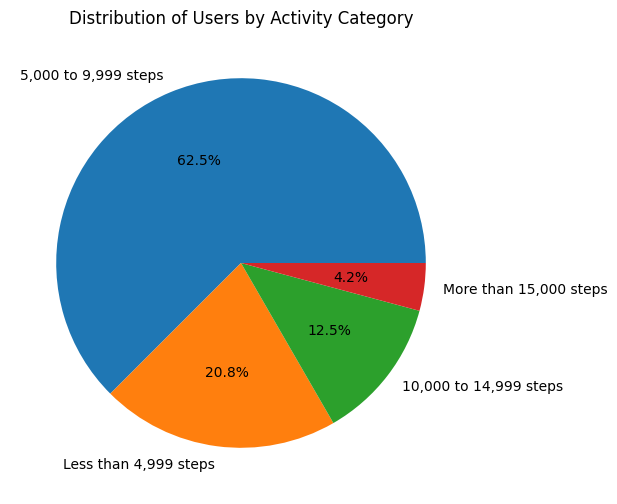

In [24]:
def activity_category(steps):
    if steps >= 15000:
        return 'More than 15,000 steps'
    elif steps >= 10000:
        return '10,000 to 14,999 steps'
    elif steps >= 5000:
        return '5,000 to 9,999 steps'
    else:
        return 'Less than 4,999 steps'

summary_df['ActivityCategory'] = summary_df['AverageSteps'].map(activity_category) 

plt.figure(figsize=(6, 6))
plt.pie(summary_df['ActivityCategory'].value_counts(), labels = summary_df['ActivityCategory'].value_counts().index, autopct="%1.1f%%")
plt.title("Distribution of Users by Activity Category")
plt.show()

## Sleep distribution

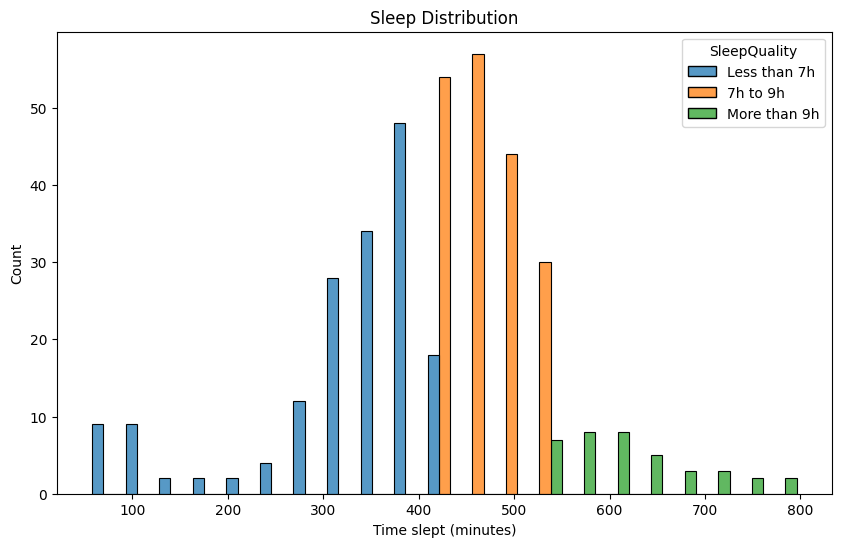

In [25]:
df['SleepQuality'] = pd.cut(
    df['TotalMinutesAsleep'],
    bins=[0, 420, 540, float('inf')],
    labels=['Less than 7h', '7h to 9h', 'More than 9h']
)

df['SleepQuality'] = pd.Categorical(
    df['SleepQuality'],
    categories=['Less than 7h', '7h to 9h', 'More than 9h'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalMinutesAsleep', hue='SleepQuality', multiple='dodge', bins=21)
plt.title('Sleep Distribution')
plt.xlabel('Time slept (minutes)')
plt.show()

We can see the users average minutes of sleep, following a normal distribution. A majority of users sleep approximately 300 to 540 minutes.

## Sleep vs Steps

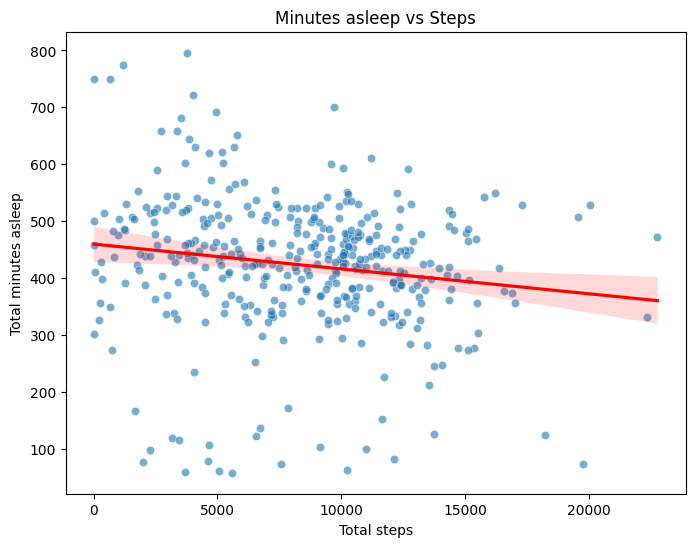

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalSteps', y='TotalMinutesAsleep', alpha=0.6)
sns.regplot(data=df, x='TotalSteps', y='TotalMinutesAsleep', scatter=False, color='red')

plt.title("Minutes asleep vs Steps")
plt.xlabel("Total steps")
plt.ylabel("Total minutes asleep")
plt.show()

We can see that the more steps users take, slighty less they sleep, but it is minimal.

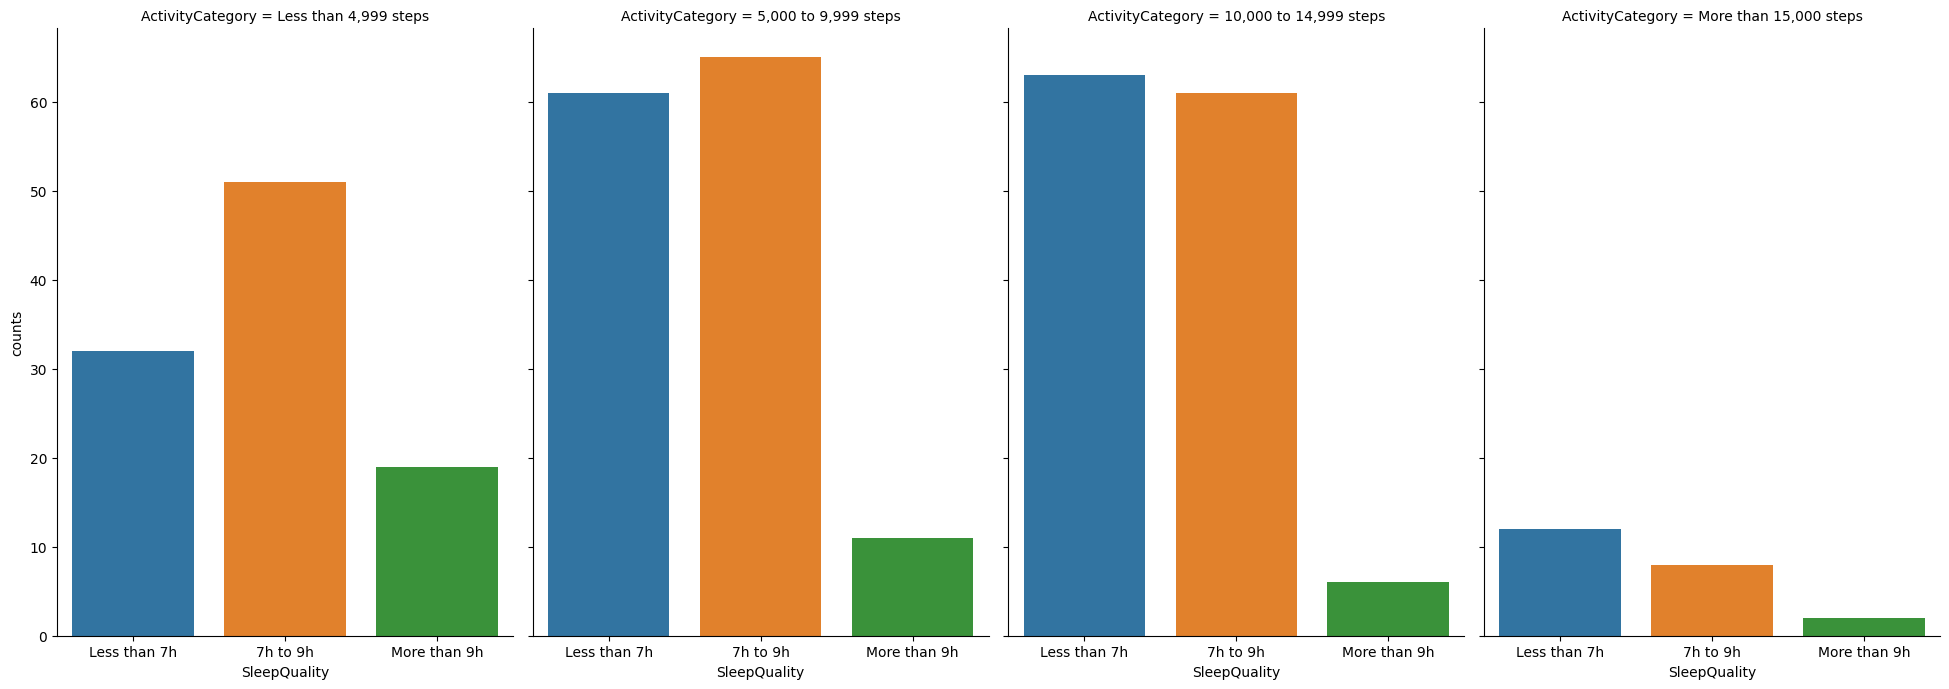

In [27]:
df['ActivityCategory'] = df['TotalSteps'].apply(activity_category)

df['ActivityCategory'] = pd.Categorical(
    df['ActivityCategory'],
    categories=[
        'Less than 4,999 steps',
        '5,000 to 9,999 steps',
        '10,000 to 14,999 steps',
        'More than 15,000 steps'
    ],
    ordered=True
)

summary = df.groupby(['SleepQuality', 'ActivityCategory']).size().reset_index(name='counts')

g = sns.catplot(
    data=summary,
    kind='bar',
    x='SleepQuality',
    y='counts',
    col='ActivityCategory',
    height=7,
    aspect=0.7,
)
plt.show()

It seems that on average the best sleep is achieve when the total steps during the day are less than 9,999 steps.

## Steps vs Calories

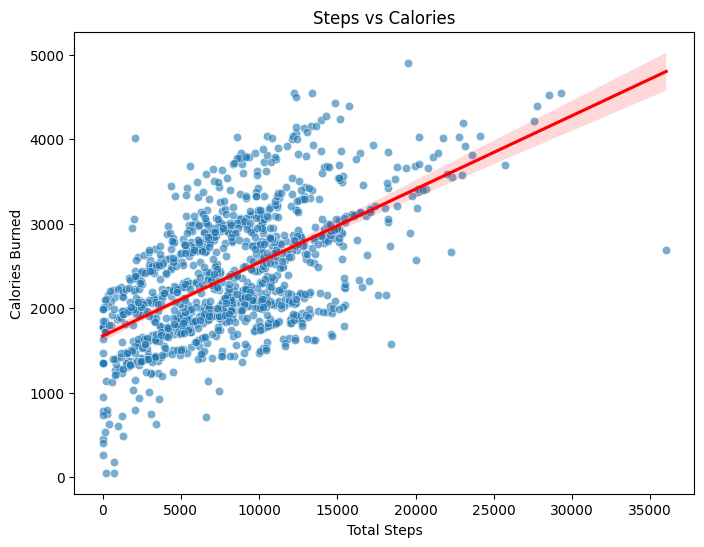

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dailyActivity, x='TotalSteps', y='Calories', alpha=0.6)
sns.regplot(data=df_dailyActivity, x='TotalSteps', y='Calories', scatter=False, color='red')

plt.title("Steps vs Calories")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.show()

Their is positive correlation between Total Steps and Calories burned. The more steps a user takes, the more calories they burn.

## Average steps by day of the week

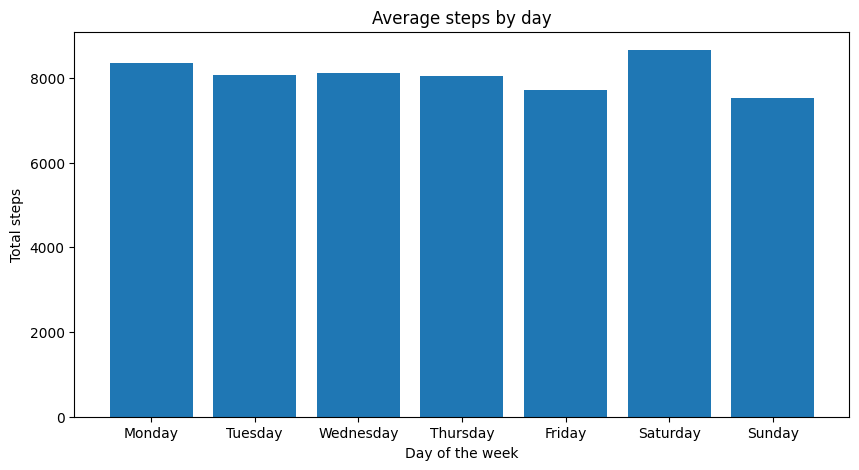

In [29]:
df_dailyActivity['DayOfWeek'] = df_dailyActivity['Date'].dt.day_name()
steps_by_day = df_dailyActivity.groupby('DayOfWeek')['TotalSteps'].mean()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
steps_by_day = steps_by_day.reindex(ordered_days)

plt.figure(figsize=(10, 5))
plt.bar(steps_by_day.index, steps_by_day.values)
plt.title('Average steps by day')
plt.xlabel('Day of the week')
plt.ylabel('Total steps')
plt.show()

We can see that in Saturday users have the most steps and in Sunday the least, but the difference between days of the week is minimal.

## Use of device by day of the week

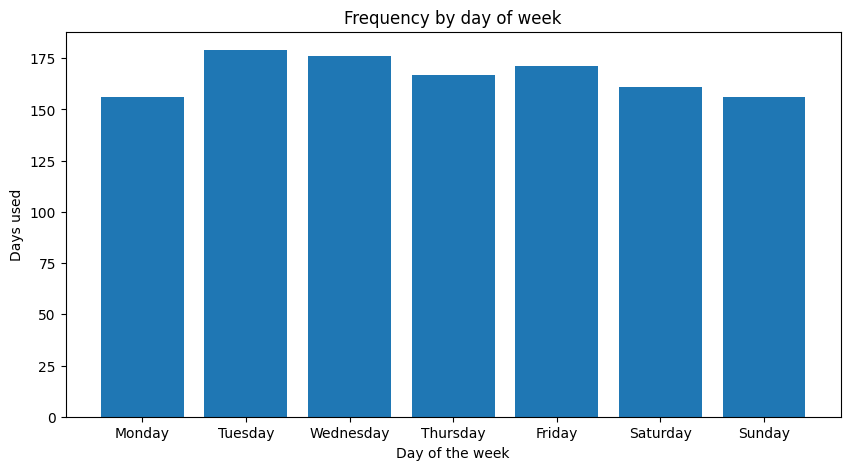

In [30]:
days_of_week_usage = df_dailyActivity.groupby('DayOfWeek').size()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week_usage = days_of_week_usage.reindex(ordered_days)

plt.figure(figsize=(10, 5))
plt.bar(days_of_week_usage.index, days_of_week_usage.values)
plt.title('Frequency by day of week')
plt.xlabel('Day of the week')
plt.ylabel('Days used')
plt.show()

The people use the device the most in Tuesday, Wednesday and Friday. We can send motivation message for people in the other days.

## Days of use of device

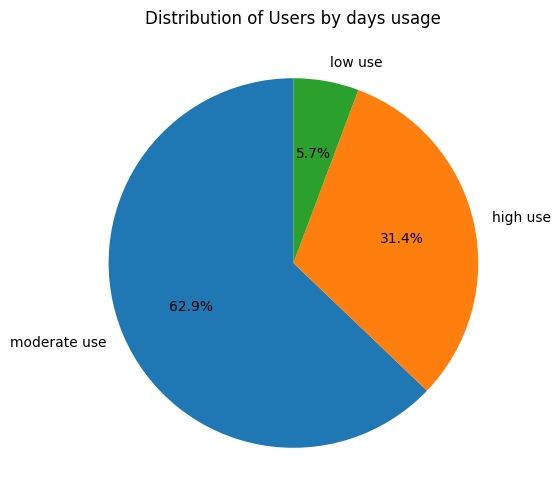

In [31]:
daily_use = (
    df_dailyActivity
    .groupby('Id')
    .size()
    .reset_index(name='days_used')
)

daily_use['usage'] = pd.cut(
    daily_use['days_used'],
    bins=[0, 21, 41, 62],
    labels=['low use', 'moderate use', 'high use'],
    right=True,
    include_lowest=True
)

plt.figure(figsize=(6, 6))
plt.pie(
    daily_use['usage'].value_counts(), 
    labels = daily_use['usage'].value_counts().index, 
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Users by days usage")
plt.show()

Only 31% of users used their device more than 60% of all days. We can motivate users to wear device everyday for some badges and bonuses.

## Time of use of device

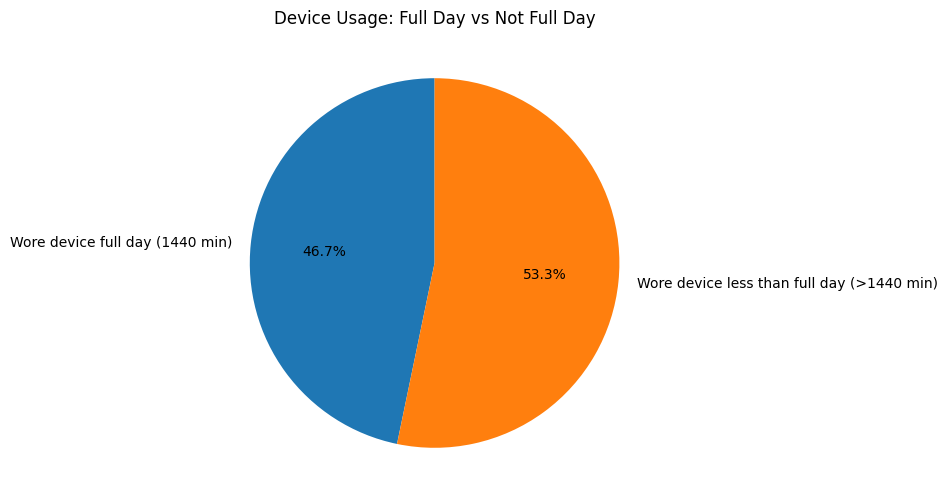

In [32]:
TotalWearMinutes = df_dailyActivity['VeryActiveMinutes'] + df_dailyActivity['FairlyActiveMinutes'] + df_dailyActivity['LightlyActiveMinutes'] + df_dailyActivity['SedentaryMinutes']
full_day = (TotalWearMinutes >= 1440).sum()
not_full_day = (TotalWearMinutes < 1440).sum()

labels = ['Wore device full day (1440 min)', 'Wore device less than full day (>1440 min)']
sizes = [full_day, not_full_day]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Device Usage: Full Day vs Not Full Day')
plt.show()

Only in 47% of observations users used the device the thole day. We can motivate users to wear device whole day for some badges and bonuses.

# Summary

In this analysis, we explored the relationship between users physical activity and their sleep duration. The dataset, derived from Fitbit tracker data, included month of sleep and 2 months activity data for multiple users.
We categorized users based on:

**Sleep quality:**
* Less than 7 hours
* 7 to 9 hours (recommended range)
* More than 9 hours

**Activity level:**
* Less than 4,999 steps (sedentary)
* 5,000 to 9,999 steps (low active)
* 10,000 to 14,999 steps (active)
* More than 15,000 steps (very active)

**Key Findings:**
* 63% of users on average does 5000 to 9999 steps a day.
* The majority of users slept between 5 and 9 hours regardless of activity level.
* Users with higher step counts (especially over 10,000) were more likely to also report sufficient or higher sleep durations.
* Only 31% of users used their device more than 60% of all days.
* Only in 47% of observations users used the device the thole day.

**Ideas for the Bellabeat app:**
* Bellabeat could send a reminder to go to bed at a certain time and recommend activities to relax and improve sleep.
* Bellabeat could also recommend some health and fitness articles within the Bellabeat app as a great way to motivate users.
* Bellabeat could motivate users to wear their device everyday whole day for some badges and bonuses.
* Calories are burnt by the steps taken daily. Based on users objectives, Bellabeat could recommend a minimum number of steps for users to take to encorage them to achieve their goals.
* In order to create a habit of exercising every day, Bellabeat could send a notification at a specific time for the user to remain consistent throughout the week.